# Project: `Student Academic Performance`

**Group:** `SIC 702` `P1 G13`  
**Team Members:** `Abdelrahman Alaa`, `Kareem Reda`, `Nouran Ashraf`  
**Facilitator:** `Salma`

---

## Project Overview
This project aims to analyze student performance in a school or university setting and understand the factors that influence their grades. By leveraging Python libraries such as Pandas for data cleaning and processing, and Matplotlib/Seaborn for visualization, we explore patterns and insights within the dataset. The analysis includes descriptive statistics and graphical representations to highlight relationships between variables such as gender, parental education, and test preparation courses with student scores.

**Kaggle Dataset Link:** [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

---

## Dataset Columns

| Column Name                  | Description                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| `gender`                      | The student's gender (male/female).                                         |
| `race/ethnicity`              | The student's racial/ethnic group (e.g., group A, B, C, etc.).             |
| `parental level of education` | The highest education level achieved by the student's parents.              |
| `lunch`                       | Type of lunch received (standard or free/reduced).                          |
| `test preparation course`     | Indicates if the student completed a test preparation course (none/completed). |
| `math score`                  | Score achieved in the mathematics exam (0-100).                             |
| `reading score`               | Score achieved in the reading exam (0-100).                                 |
| `writing score`               | Score achieved in the writing exam (0-100).                                 |


## Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/row/StudentsPerformance.xls")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Exploraty Data Analysis

In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


### Insights Summary

- **Gender:** Slightly more females (518) than males in the dataset.  
- **Race/Ethnicity:** Most students belong to **group C** (319).  
- **Parental Level of Education:** The most common is **some college** (226).  
- **Lunch Type:** Majority have **standard lunch** (645).  
- **Test Preparation Course:** Most students did **not complete** a test preparation course (642).  

#### Numerical Scores
- **Math Score:**  
  - Mean: 66.09, Std: 15.16  
  - Range: 0 – 100  
  - Median: 66, Q1: 57, Q3: 77  

- **Reading Score:**  
  - Mean: 69.17, Std: 14.60  
  - Range: 17 – 100  
  - Median: 70, Q1: 59, Q3: 79  

- **Writing Score:**  
  - Mean: 68.05, Std: 15.20  
  - Range: 10 – 100  
  - Median: 69, Q1: 57.75, Q3: 79  

**Key Observations:**  
- Scores are fairly consistent across subjects with averages around 66–69.  
- Some low scores indicate presence of outliers (e.g., math min=0, writing min=10).  
- Majority of students did not take the test preparation course, which could affect performance.  
- Standard lunch is more common, which might correlate with better performance than free/reduced lunch.  

In [6]:
for col in df.columns:
    print(df[col].value_counts())
    print('Number of unique values: ',df[col].nunique())
    print('-'*50)

gender
female    518
male      482
Name: count, dtype: int64
Number of unique values:  2
--------------------------------------------------
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Number of unique values:  5
--------------------------------------------------
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
Number of unique values:  6
--------------------------------------------------
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
Number of unique values:  2
--------------------------------------------------
test preparation course
none         642
completed    358
Name: count, dtype: int64
Number of unique values:  2
--------------------------------------------------
math score
65    36
62    35
69    32
59    32
61    27
      

## Data Preprocessing

In [7]:
df.isna().sum().sum()

0

In [8]:
df.duplicated().sum()

0

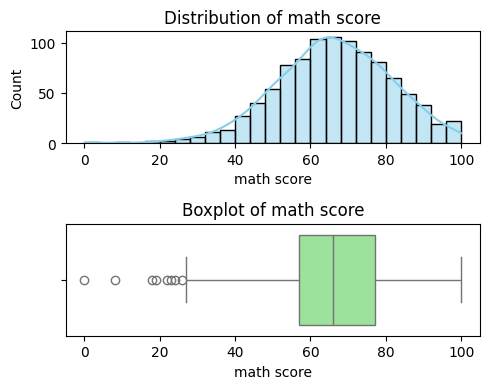

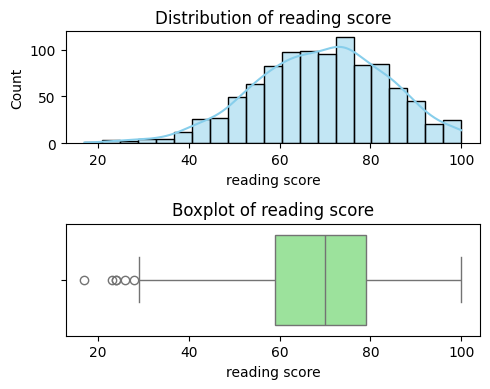

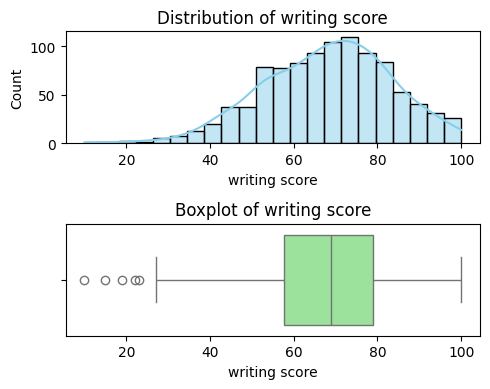

In [9]:
numerical_cols = ['math score','reading score','writing score']

for col in numerical_cols:
    fig, axes = plt.subplots(2, 1, figsize=(5,4))
    # histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')

    # boxplot
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [10]:
# Removing Outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

df.reset_index(drop=True, inplace=True)

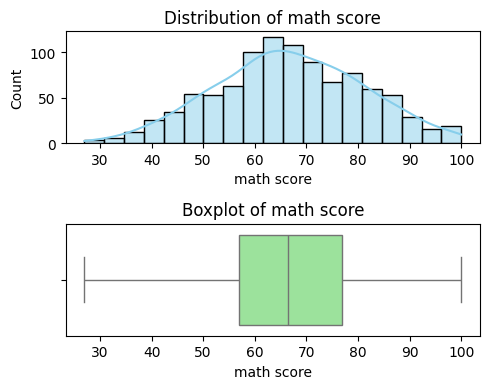

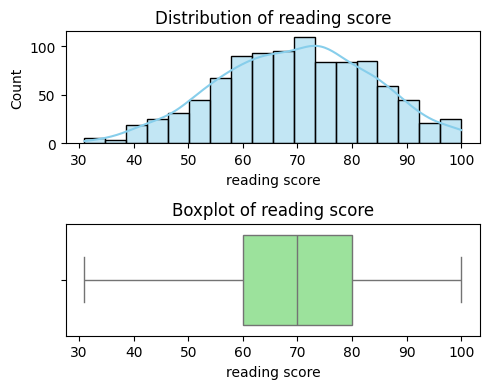

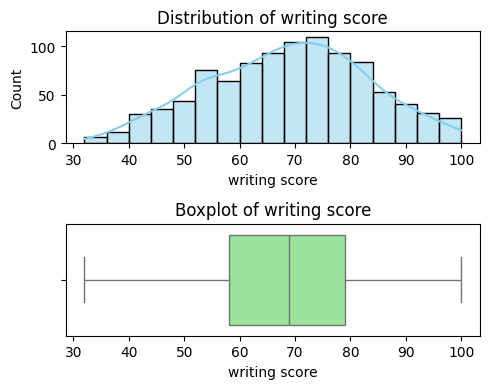

In [11]:
numerical_cols = ['math score','reading score','writing score']

for col in numerical_cols:
    fig, axes = plt.subplots(2, 1, figsize=(5,4))
    # histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')

    # boxplot
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

## Data Analysis & Visualization